# Problem Set 1, due April 13th at 3:30pm 
(in other words, it is due at noon, or one minute after 11:59am).

###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print ("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print ("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print ("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print ("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print ("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print ("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       5.1.0 (need at least 1.0)
Numpy version:        1.11.3 (need at least 1.7.1)
SciPy version:        0.18.1 (need at least 0.12.0)
Pandas version:       0.19.2 (need at least 0.11.0)
Maplotlib version:     2.0.0 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
flights_df= pd.read_csv('flights.csv')

In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [440]:
flights_df.dest.unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

In [441]:
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [5]:
#Filter flights with dest = SEA & origin in ('JFK','EWR','LGA') & year = 2013
flights_df_dest_sea = flights_df[(flights_df.dest=='SEA') &
                                 ((flights_df.origin=='JFK') | (flights_df.origin=='EWR')| (flights_df.origin=='LGA'))&
                                 (flights_df.year==2013)]               

In [8]:
flights_df_dest_sea.groupby('dest').dest.count()

dest
SEA    3923
Name: dest, dtype: int64

 All the flights in the orignial dataset originate from NYC and are from the year 2013.
 There are 3923 flights from NYC to Seattle in 2013

(b) How many airlines fly from NYC to Seattle?

In [10]:
flights_df_dest_sea.carrier.nunique()

5

In [445]:
flights_df_dest_sea.carrier.unique()

array(['AS', 'DL', 'UA', 'B6', 'AA'], dtype=object)

There are 5 unique airlines that fly from NYC to SEA.

Unique airlines are :
AS,
DL,
UA,
B6,
AA

(c) How many unique air planes fly from NYC to Seattle?

In [446]:
# Unique flights are identified by tailnum
flights_df_dest_sea.tailnum.nunique()

935

(d) What is the average arrival delay for flights from NYC to Seattle?

In [15]:
avg_arr_delay = flights_df_dest_sea.arr_delay.mean()
print(avg_arr_delay)
print("Rounded to 1 decimal point = %(rounded_value).1f" %{'rounded_value':round(avg_arr_delay,1)})

-1.0990990990990992
Rounded to 1 decimal point = -1.1


The average arrival delay of flights from NYC to Seattle is -1.0990990990990992 which implies that on an average the flights arrive earlier than the scheduled time by approximately 1.1 mins.

(e) What proportion of flights to Seattle come from each NYC airport?

In [24]:
flights_sea_by_origin = flights_df_dest_sea.groupby('origin').origin.agg(['count'])

In [25]:
flights_sea_by_origin

,count
origin,
EWR,1831
JFK,2092


In [450]:
flights_sea_by_origin['prop'] = flights_sea_by_origin.apply(lambda x:x / float(x.sum()))
flights_sea_by_origin

,count,prop
origin,,
EWR,1831,0.466735
JFK,2092,0.533265


0.466735 or 46.6735% of the flights originate from EWR 
while 
0.533265 or 53.3265% of the flights originate from JFK 

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [451]:
#Create new column Date by combining columns year, month, day
flights_df['Date']=pd.to_datetime(flights_df.year*10000+flights_df.month*100+flights_df.day,format='%Y%m%d')

In [452]:
#Verifying new column
flights_df.loc[:,['Date','year','month','day']].head()

,Date,year,month,day
0,2013-01-01,2013,1,1
1,2013-01-01,2013,1,1
2,2013-01-01,2013,1,1
3,2013-01-01,2013,1,1
4,2013-01-01,2013,1,1


In [453]:
#Group by new Date column to obtain mean arr_delay & dep_delay
delay = flights_df.groupby('Date').mean()
delay = delay.loc[:,['dep_delay','arr_delay']]

In [454]:
#Max dep_delay & arr_delay time in minutes
delay.apply(max,axis=0)

dep_delay    83.536921
arr_delay    85.862155
dtype: float64

In [455]:
#The day with largest average arrival and departure delay
delay.apply(np.argmax,axis=0)

dep_delay   2013-03-08
arr_delay   2013-03-08
dtype: datetime64[ns]

The largest average departure delay and arrival delay occur on the same day 03/08/2013

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [456]:
#Find the day with the highest number of delayed flights to identify the worst day to fly out of NYC

#filter the flights where the dep delay is positive
t = flights_df.loc[(flights_df.dep_delay>0),:]
t = t.groupby('Date').count().sort_values('dep_delay',ascending=False).head(1).loc[:,'dep_delay']
t

Date
2013-12-23    674
Name: dep_delay, dtype: int64

The day with the highest number of departure delays in NYC was on 23rd Dec 2013.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [457]:
#Analyzing seasonal pattern by month
seasonal_delay = flights_df.groupby('month').mean().loc[:,['dep_delay']]
#reset index
seasonal_delay = seasonal_delay.reset_index()

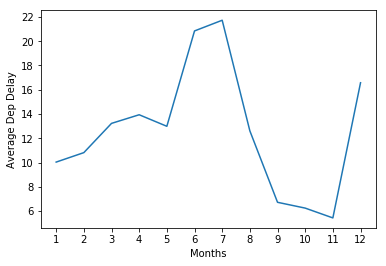

In [458]:
%matplotlib inline
plt.plot(seasonal_delay.month,seasonal_delay.dep_delay)
plt.xticks(np.arange(min(seasonal_delay.month), max(seasonal_delay.month)+1, 1.0))
plt.xlabel('Months')
plt.ylabel('Average Dep Delay')

On aggregrating the average departure delay by month, it is observed  that there is a peak in the dep_delay in the months of June and July along with December. Holiday seasons could attribute to the departure delay during these months due to additional air traffic. Winter weather during December could be an added factor for delays during Dec.

(d) On average, how do departure delays vary over the course of a day?

In [459]:
#Map 24:00 hours of dep_time as 00:00
flights_df['hour_new'] = flights_df.hour.apply(lambda x: x if x!=24.0 else 0)

In [460]:
#Verify correct mapping
flights_df.loc[:,['hour','hour_new']]
flights_df.loc[flights_df.hour==24.0,['hour','hour_new']].head()

,hour,hour_new
54966,24.0,0.0
80973,24.0,0.0
87893,24.0,0.0
91492,24.0,0.0
91493,24.0,0.0


In [461]:
#Group by hour of the day
day_delay =  flights_df.groupby('hour_new').mean().loc[:,['dep_delay']]
day_delay

,dep_delay
hour_new,
0.0,126.609890
1.0,207.049327
2.0,239.921875
3.0,304.727273
4.0,-5.554098
5.0,-4.355644
6.0,-1.520552
7.0,0.223289
8.0,1.091432


In [462]:
#reset index
day_delay = day_delay.reset_index()

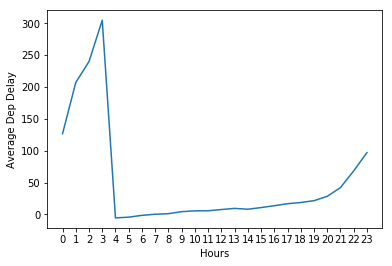

In [463]:
plt.plot(day_delay.hour_new, day_delay.dep_delay)
plt.xticks(np.arange(min(day_delay.hour_new), max(day_delay.hour_new)+1, 1.0))
plt.xlabel('Hours')
plt.ylabel('Average Dep Delay')

The flights departing in the midnight hours (from 23:00 to 3:00)seem to have the highest departure delays. The departure delays are the lowest during the early morning hours (4:00 - 6:00) with a steady rise through the day.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [464]:
# Function to calculate speed
def flight_speed(x):
    return x['distance']/x['air_time']

In [465]:
#New column speed indicates the speed of each flight
flights_df['speed']=flights_df.loc[:,['air_time','distance']].apply(flight_speed,axis=1)

In [466]:
#Verify new column speed values
flights_df.loc[:,['distance','air_time','speed']].head()

,distance,air_time,speed
0,1400,227.0,6.167401
1,1416,227.0,6.237885
2,1089,160.0,6.806250
3,1576,183.0,8.612022
4,762,116.0,6.568966


In [467]:
flights_df.speed.max()

11.723076923076922

In [468]:
flights_df.loc[flights_df['speed'].idxmax(),:]

Unnamed: 0                 216448
year                         2013
month                           5
day                            25
dep_time                     1709
dep_delay                       9
arr_time                     1923
arr_delay                     -14
carrier                        DL
tailnum                    N666DN
flight                       1499
origin                        LGA
dest                          ATL
air_time                       65
distance                      762
hour                           17
minute                          9
Date          2013-05-25 00:00:00
hour_new                       17
speed                     11.7231
Name: 216447, dtype: object

With a speed of 11.7231 miles per minute, DL airline with tailnum N666DN, flight 1499 from LGA to ATL flew the fastest in 2013

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [469]:
# Create new column for carrier, flight and dest
flights_df['carrier-flight-dest']=flights_df["carrier"] + '-' +flights_df["flight"].map(str) + '-' +flights_df["dest"]
t = flights_df.loc[:,['Date','carrier-flight-dest','month','day','carrier','flight','dest']]
t.head(1)

,Date,carrier-flight-dest,month,day,carrier,flight,dest
0,2013-01-01,UA-1545-IAH,1,1,UA,1545,IAH


In [470]:
t1 = t.groupby('carrier-flight-dest').Date.nunique()

In [471]:
#filtering flights that fly 365 times in 2013
t1 = t1[t1==365]
#Converting to dataframe
t2=pd.DataFrame({'carrier-flight-dest':t1.index, 'occurrence':t1.values})
t2

,carrier-flight-dest,occurrence
0,AA-119-LAX,365
1,AA-1357-SJU,365
2,AA-1611-MIA,365
3,AA-181-LAX,365
4,AA-59-SFO,365
5,B6-1783-MCO,365
6,B6-219-CLT,365
7,B6-359-BUR,365
8,B6-371-FLL,365
9,B6-431-SRQ,365


There are 18 flights that fly everday.

In [472]:
#Extracting unique destinations for the 18 flights
t3 = t2['carrier-flight-dest'].str.split('-').apply(lambda x: x[2])
t3.unique()

array(['LAX', 'SJU', 'MIA', 'SFO', 'MCO', 'CLT', 'BUR', 'FLL', 'SRQ',
       'TPA', 'IAD', 'HNL', 'LAS'], dtype=object)

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


Among the top 3 flight destinations from NYC, which airport has the highest number of flights for each of the three destinations?

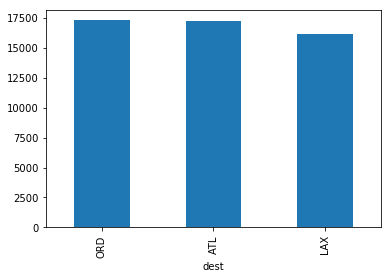

In [473]:
# Identifying the top 3 flight destination from NYC in 2013 based on flight counts
t = flights_df.groupby('dest').size().sort_values(axis=0, ascending=False).head(3)
t.plot(kind='bar')

The top 3 flight destinations are ORD, ATL and LAX

In [474]:
#Flight count from each NYC airport to the destinations
t = flights_df.loc[(flights_df.dest=='ORD')|(flights_df.dest=='LAX')|(flights_df.dest=='ATL'),:]
t = t.groupby(['dest','origin']).origin.agg(['count']).reset_index()
t

,dest,origin,count
0,ATL,EWR,5022
1,ATL,JFK,1930
2,ATL,LGA,10263
3,LAX,EWR,4912
4,LAX,JFK,11262
5,ORD,EWR,6100
6,ORD,JFK,2326
7,ORD,LGA,8857


In [475]:
#Rearranging columns
t = t.pivot(index='dest',columns='origin',values='count').reset_index()
t

origin,dest,EWR,JFK,LGA
0,ATL,5022.0,1930.0,10263.0
1,LAX,4912.0,11262.0,NaN
2,ORD,6100.0,2326.0,8857.0


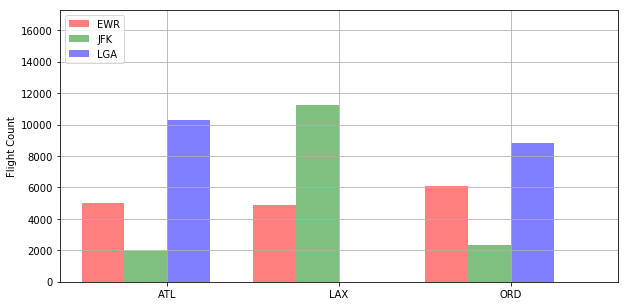

In [476]:
#Creating a grouped bar plot 
# Setting the positions and width for the bars
pos = list(range(len(t['EWR'])))
width = 0.25
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos,t['EWR'],
        width,
        alpha=0.5,
        color='red',
        label=t['dest'][0])
plt.bar([p + width for p in pos],
        t['JFK'],
        width,
        alpha=0.5,
        color='green',
        label=t['dest'][1])
plt.bar([p + width*2 for p in pos],
        t['LGA'],
        width,
        alpha=0.5,
        color='blue',
        label=t['dest'][2])
# Set the y axis label
ax.set_ylabel('Flight Count')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(t['dest'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(t['EWR'] + t['JFK'] + t['LGA'])] )

# Adding the legend and showing the plot
plt.legend(['EWR', 'JFK', 'LGA'], loc='upper left')
plt.grid()
plt.show()


LGA airprot has the highest number of flights to ATL. 
JFK airport has the highest number of flights to LAX.
LGA airport has the highest number of flights to ORD. 

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [477]:
#Grouping flight data by Origin, date and hour to help merge to the weather dataset
f_df= flights_df.groupby(['origin','Date','hour_new'],as_index=False).dep_delay.mean()

In [478]:
#Reading weather data
weather_df = pd.read_csv('weather.csv')
#New date column
weather_df['Date']=pd.to_datetime(weather_df.year*10000+weather_df.month*100+weather_df.day,format='%Y%m%d')
weather_df = weather_df.rename(columns={'hour':'hour_new'})
weather_df.head(1)

,Unnamed: 0,origin,year,month,day,hour_new,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,Date
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2013-01-01


In [479]:
#Merge flights and weather data
result = pd.merge(f_df,weather_df,how='left',on=['origin','Date','hour_new'])
result.head(1)

,origin,Date,hour_new,dep_delay,Unnamed: 0,year,month,day,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,EWR,2013-01-01,5.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's consider three weather attributes and analyze its possible impacts on departure delays.
Weather attributes: Temp, Dew point, Visibility

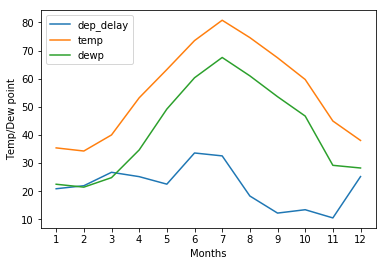

In [480]:
#Calculate the average weather attribute value and dep delay by month
t1 = result.groupby('month',as_index=False).mean()

#Plotting avg. dep_delay by month
plt.plot(t1.month,t1.dep_delay)

#Adding the avg temp values and dewp value by month to the plot
plt.plot(t1.month,t1.temp)
plt.plot(t1.month,t1.dewp)
plt.legend(['dep_delay', 'temp', 'dewp'], loc='upper left')
plt.xticks(np.arange(min(t1.month), max(t1.month)+1, 1.0))
plt.xlabel('Months')
plt.ylabel('Temp/Dew point')

From the plot we can observe that the dep delay's are highest in the month of June, July and December.
Including temp and dewp in the plot is redundant as the variables seem collinear.
One of these variables can be used to possibly explain the dep delay's in a month.
For example, the temp is at its peak during the months of June and July. High temperature lead to delayed flights. 
However, in December, the temperature are low but departure delays are still high. Another weather attribute might account for it.

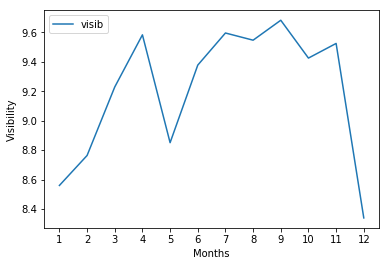

In [481]:
#Analyzing the visibility weather attribute 
plt.plot(t1.month,t1.visib)
plt.legend(['visib'], loc='upper left')
plt.xticks(np.arange(min(t1.month), max(t1.month)+1, 1.0))
plt.xlabel('Months')
plt.ylabel('Visibility')

It is seen that the visibility is at its lowest during the month of December which can possibly be a factor contributing to the departure delays during the month.